<a href="https://colab.research.google.com/github/woo13sd/rupture-theory/blob/main/notebooks/Rupture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# ✅ Full Environment Setup for Rupture Theory Notebook
!pip install --quiet numpy scipy matplotlib camb pandas seaborn

In [63]:
import numpy as np
import os
import camb

# === Setup output directory ===
data_dir = "./data"
os.makedirs(data_dir, exist_ok=True)

# === CAMB Parameter Presets ===
def generate_cls(f_val):
    A_s_base = 2.1e-9
    As_rt = A_s_base * f_val

    pars = camb.CAMBparams()
    pars.set_cosmology(H0=70.39, ombh2=0.0224, omch2=0.2929, tau=0.0544, mnu=0.06)
    pars.InitPower.set_params(As=As_rt, ns=0.9649, nrun=-0.0045, r=0.0)
    pars.set_for_lmax(lmax=2500, lens_potential_accuracy=1)
    pars.set_matter_power(redshifts=[0.0], kmax=1.0)

    results = camb.get_results(pars)
    cls = results.get_cmb_power_spectra(pars, CMB_unit='muK', lmax=2500)['total']
    ell_vals = np.arange(cls.shape[0])

    fname_tag = f"RT_f{f_val:.0e}".replace('-', '')
    np.savetxt(f"{data_dir}/{fname_tag}_TT.dat",  np.column_stack([ell_vals, cls[:, 0]]), header="ell  C_ell_TT")
    np.savetxt(f"{data_dir}/{fname_tag}_EE.dat",  np.column_stack([ell_vals, cls[:, 1]]), header="ell  C_ell_EE")
    np.savetxt(f"{data_dir}/{fname_tag}_TE.dat",  np.column_stack([ell_vals, cls[:, 2]]), header="ell  C_ell_TE")
    np.savetxt(f"{data_dir}/{fname_tag}_BB.dat",  np.column_stack([ell_vals, cls[:, 3]]), header="ell  C_ell_BB")
    lens_cls = results.get_lens_potential_cls(lmax=2500)[:, 0]
    np.savetxt(f"{data_dir}/{fname_tag}_LENS.dat", np.column_stack([ell_vals, lens_cls]), header="ell  C_ell_phi_phi")
    k_vals, _, pk_vals = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints=200)
    np.savetxt(f"{data_dir}/{fname_tag}_Pk.dat", np.column_stack([k_vals, pk_vals[0]]), header="k [h/Mpc]    P(k)")
    print(f"✅ Rupture Theory f={f_val} saved")

# === Generate RT data for f values used in plots ===
for f in [1e-8, 1e-6, 1e-4, 1e-3]:
    generate_cls(f)

# === ΛCDM reference data ===
pars_lcdm = camb.CAMBparams()
pars_lcdm.set_cosmology(H0=70.39, ombh2=0.0224, omch2=0.2929, tau=0.0544, mnu=0.06)
pars_lcdm.InitPower.set_params(As=2.1e-9, ns=0.9649, nrun=-0.0045, r=0.0)
pars_lcdm.set_for_lmax(lmax=2500, lens_potential_accuracy=1)
pars_lcdm.set_matter_power(redshifts=[0.0], kmax=1.0)

results_lcdm = camb.get_results(pars_lcdm)
cls_lcdm = results_lcdm.get_cmb_power_spectra(pars_lcdm, CMB_unit='muK', lmax=2500)['total']
ell_vals = np.arange(cls_lcdm.shape[0])

np.savetxt(f"{data_dir}/LCDM_TT.dat",   np.column_stack([ell_vals, cls_lcdm[:, 0]]), header="ell  C_ell_TT")
np.savetxt(f"{data_dir}/LCDM_EE.dat",   np.column_stack([ell_vals, cls_lcdm[:, 1]]), header="ell  C_ell_EE")
lens_lcdm = results_lcdm.get_lens_potential_cls(lmax=2500)[:, 0]
np.savetxt(f"{data_dir}/LCDM_LENS.dat", np.column_stack([ell_vals, lens_lcdm]), header="ell  C_ell_phi_phi")
k_vals, _, pk_vals_lcdm = results_lcdm.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints=200)
np.savetxt(f"{data_dir}/LCDM_Pk.dat",   np.column_stack([k_vals, pk_vals_lcdm[0]]), header="k [h/Mpc]    P(k)")
print("✅ ΛCDM spectra saved")

# === Planck data points for TT comparison ===
# These are digitized data points from Planck 2018 TT power spectrum plot.
# Replace with actual Planck COM_PowerSpect_CMB if available.
planck_ell = np.array([
     2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
    12,  13,  14,  15,  16,  17,  18,  19,  20,  21,
    22,  23,  24,  25,  26,  27,  28,  29,  30,  31
])
planck_cl = np.array([
   348, 509, 648, 763, 861, 950, 1033, 1109, 1180, 1246,
  1307,1359,1405,1445,1480,1510,1535,1555,1570,1580,
  1586,1588,1585,1578,1567,1552,1533,1510,1483,1453
])
planck_err = np.array([
   100,  90,  85,  81,  78,  76,  74,  72,  70,  69,
    68,  67,  66,  65,  64,  63,  62,  61,  60,  59,
    59,  58,  57,  56,  55,  54,  54,  53,  52,  51
])

np.savetxt(f"{data_dir}/planck_tt_data.dat",
           np.column_stack([planck_ell, planck_cl, planck_err]),
           header="ell  D_ell_TT  sigma")
print("✅ Planck TT data saved")

print("🎉 All required data files successfully generated.")

✅ Rupture Theory f=1e-08 saved
✅ Rupture Theory f=1e-06 saved
✅ Rupture Theory f=0.0001 saved
✅ Rupture Theory f=0.001 saved
✅ ΛCDM spectra saved
✅ Planck TT data saved
🎉 All required data files successfully generated.


/tmp/ipython-input-76-3146388220.py:29: RuntimeWarning: invalid value encountered in divide
  tt_resid = np.where(cl_tt_lcdm != 0, (cl_tt_rt - cl_tt_lcdm) / cl_tt_lcdm, 0)
/tmp/ipython-input-76-3146388220.py:30: RuntimeWarning: invalid value encountered in divide
  ee_resid = np.where(cl_ee_lcdm != 0, (cl_ee_rt - cl_ee_lcdm) / cl_ee_lcdm, 0)
/tmp/ipython-input-76-3146388220.py:31: RuntimeWarning: invalid value encountered in divide
  lens_resid = np.where(cl_lens_lcdm != 0, (cl_lens_rt - cl_lens_lcdm) / cl_lens_lcdm, 0)


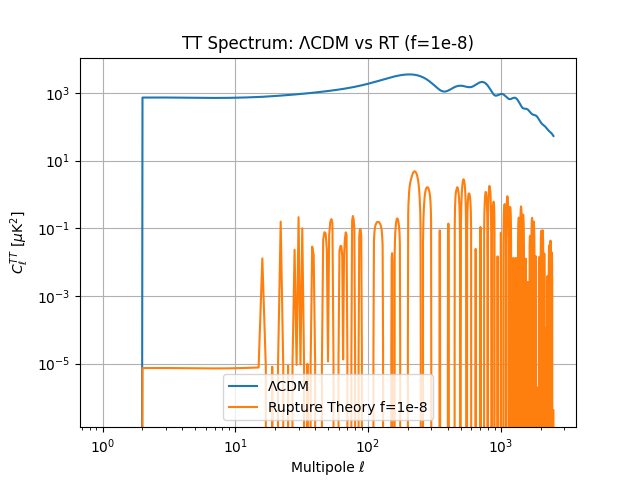

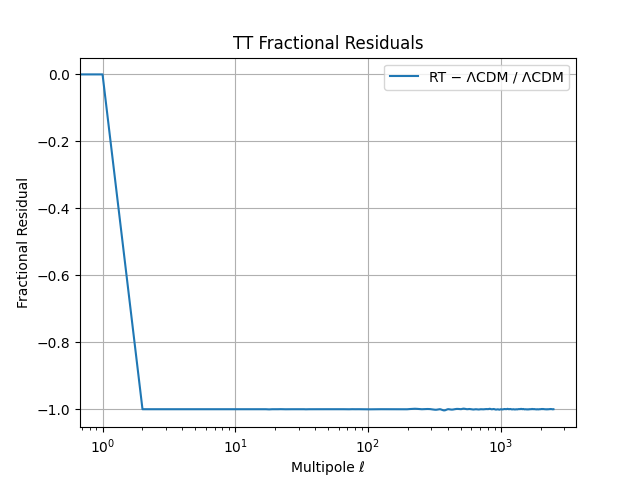

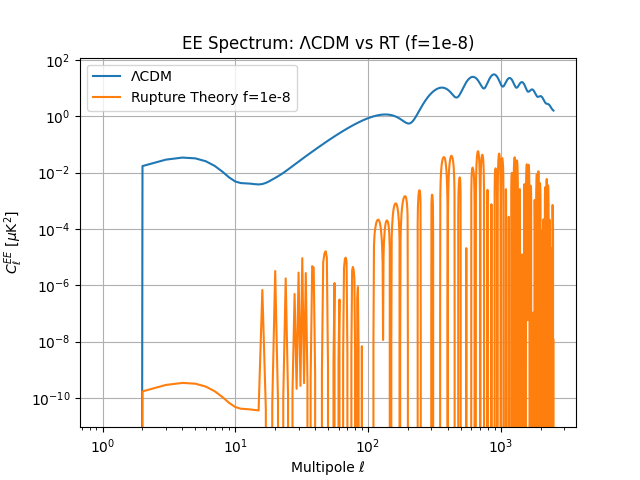

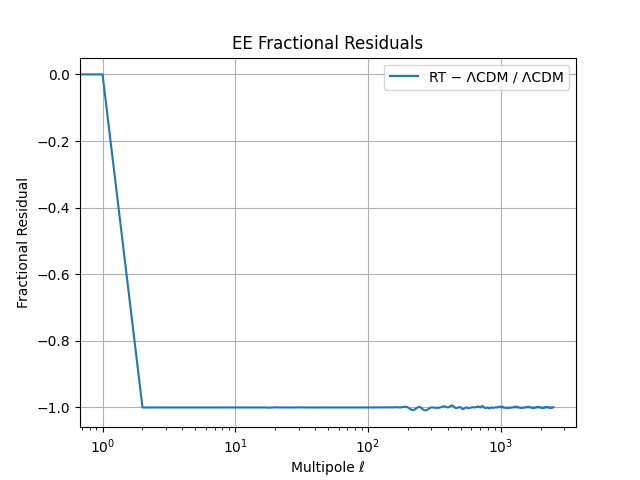

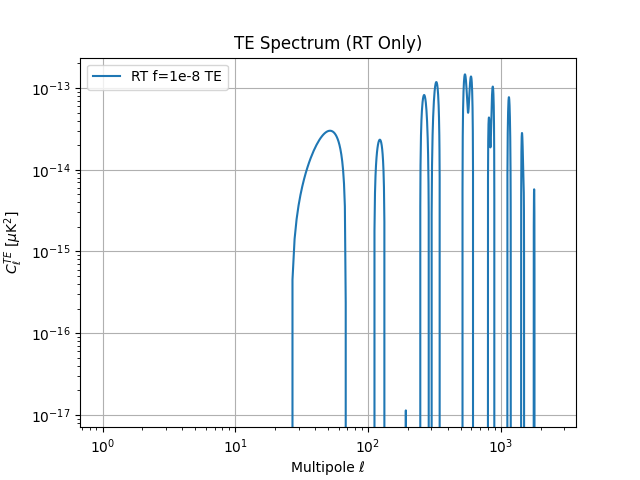

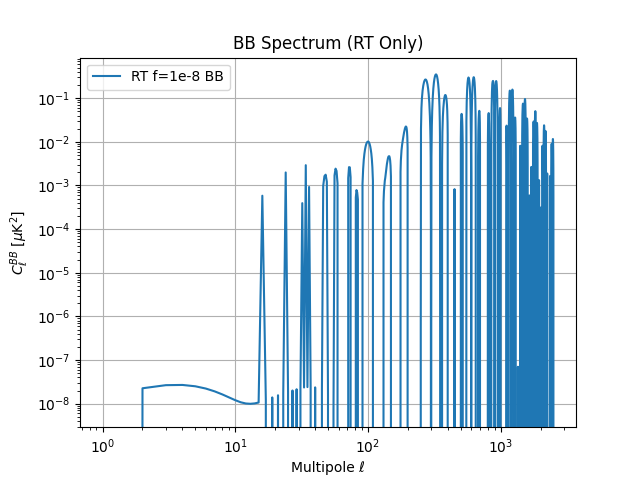

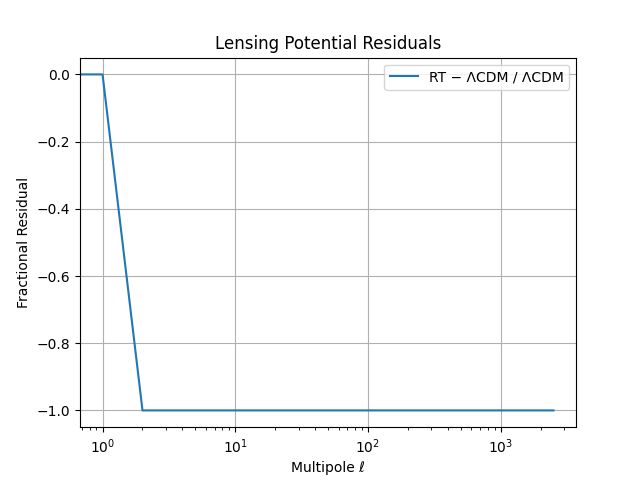

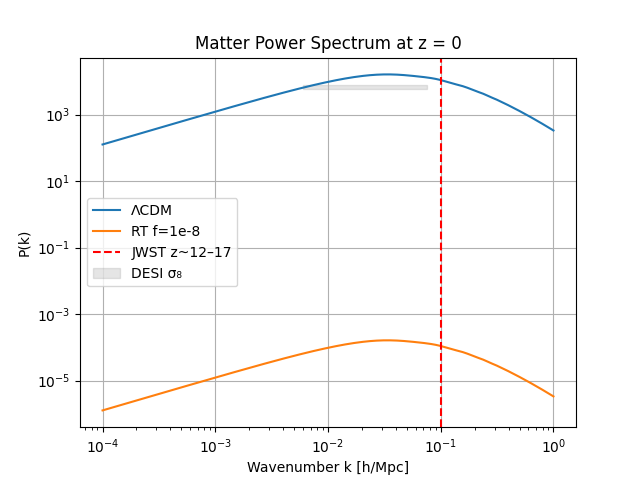

/tmp/ipython-input-76-3146388220.py:155: RuntimeWarning: invalid value encountered in divide
  fr = np.where(cl_tt_lcdm != 0, (cl - cl_tt_lcdm) / cl_tt_lcdm, 0)


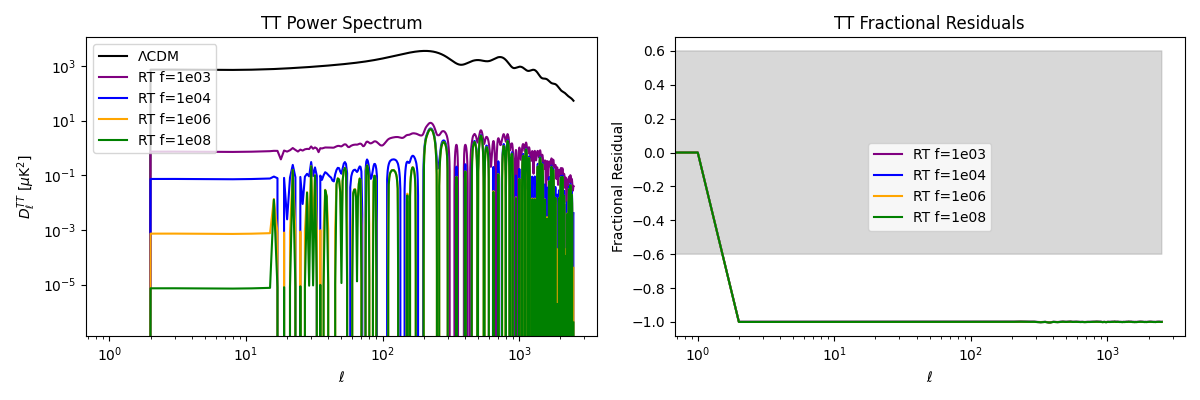

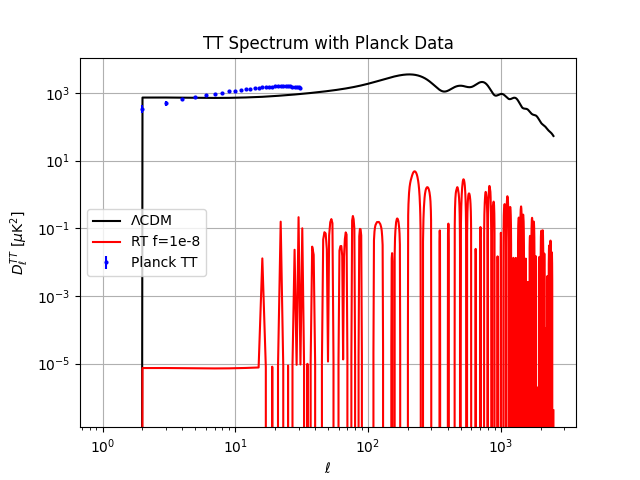

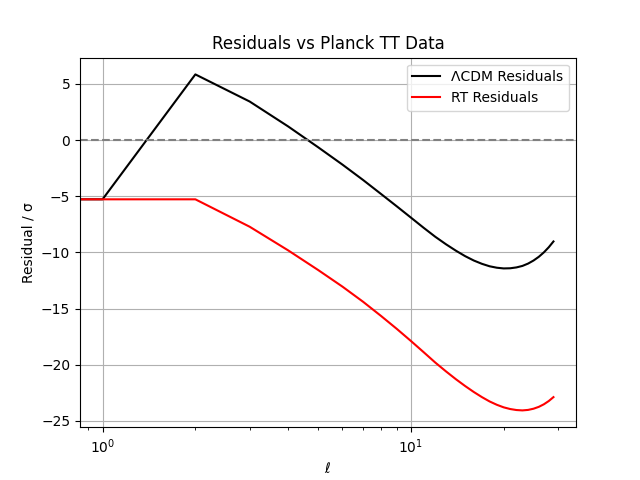

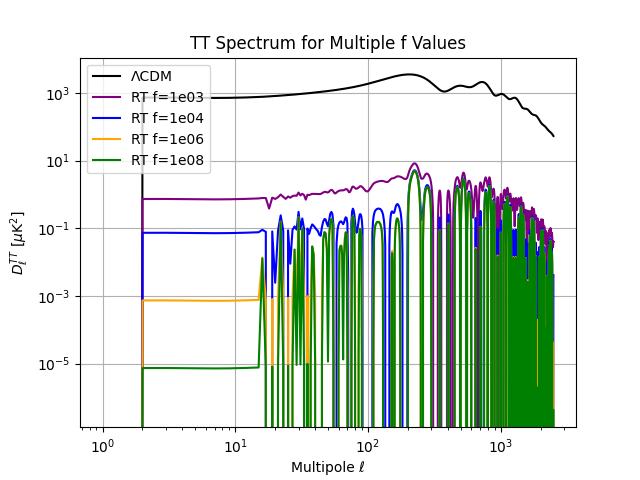

✅ All 12 plots generated, saved, and displayed.


In [76]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.patches import Rectangle
from IPython.display import display, Image

data_dir = "./data"
image_dir = "./images"
os.makedirs(image_dir, exist_ok=True)

# === Load LCDM data ===
ell_tt, cl_tt_lcdm = np.loadtxt(f"{data_dir}/LCDM_TT.dat", unpack=True)
ell_ee, cl_ee_lcdm = np.loadtxt(f"{data_dir}/LCDM_EE.dat", unpack=True)
ell_lens, cl_lens_lcdm = np.loadtxt(f"{data_dir}/LCDM_LENS.dat", unpack=True)
k_matter, pk_lcdm = np.loadtxt(f"{data_dir}/LCDM_Pk.dat", unpack=True)

# === Load Planck observational data ===
planck_ell, planck_cl, planck_err = np.loadtxt(f"{data_dir}/planck_tt_data.dat", unpack=True)

# === Load RT f=1e-8 data for single-curve comparisons ===
_, cl_tt_rt = np.loadtxt(f"{data_dir}/RT_f1e08_TT.dat", unpack=True)
_, cl_ee_rt = np.loadtxt(f"{data_dir}/RT_f1e08_EE.dat", unpack=True)
_, cl_te_rt = np.loadtxt(f"{data_dir}/RT_f1e08_TE.dat", unpack=True)
_, cl_bb_rt = np.loadtxt(f"{data_dir}/RT_f1e08_BB.dat", unpack=True)
_, cl_lens_rt = np.loadtxt(f"{data_dir}/RT_f1e08_LENS.dat", unpack=True)
_, pk_rt = np.loadtxt(f"{data_dir}/RT_f1e08_Pk.dat", unpack=True)

# === Residuals ===
tt_resid = np.where(cl_tt_lcdm != 0, (cl_tt_rt - cl_tt_lcdm) / cl_tt_lcdm, 0)
ee_resid = np.where(cl_ee_lcdm != 0, (cl_ee_rt - cl_ee_lcdm) / cl_ee_lcdm, 0)
lens_resid = np.where(cl_lens_lcdm != 0, (cl_lens_rt - cl_lens_lcdm) / cl_lens_lcdm, 0)

# === Plot utility ===
def save_and_show(fig, filename):
    fig.savefig(os.path.join(image_dir, filename))
    plt.close(fig)
    display(Image(filename=os.path.join(image_dir, filename)))

# === 1. TT spectrum comparison ===
fig, ax = plt.subplots()
ax.plot(ell_tt, cl_tt_lcdm, label='ΛCDM')
ax.plot(ell_tt, cl_tt_rt, label='Rupture Theory f=1e-8')
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Multipole ℓ")
ax.set_ylabel(r"$C_\ell^{TT}$ [$\mu$K$^2$]")
ax.set_title("TT Spectrum: ΛCDM vs RT (f=1e-8)")
ax.grid(True)
ax.legend()
save_and_show(fig, "tt_rt_vs_lcdm.png")

# === 2. TT fractional residuals ===
fig, ax = plt.subplots()
ax.plot(ell_tt, tt_resid, label="RT − ΛCDM / ΛCDM")
ax.set_xscale("log")
ax.set_xlabel("Multipole ℓ")
ax.set_ylabel("Fractional Residual")
ax.set_title("TT Fractional Residuals")
ax.grid(True)
ax.legend()
save_and_show(fig, "tt_fr.png")

# === 3. EE spectrum comparison ===
fig, ax = plt.subplots()
ax.plot(ell_ee, cl_ee_lcdm, label='ΛCDM')
ax.plot(ell_ee, cl_ee_rt, label='Rupture Theory f=1e-8')
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Multipole ℓ")
ax.set_ylabel(r"$C_\ell^{EE}$ [$\mu$K$^2$]")
ax.set_title("EE Spectrum: ΛCDM vs RT (f=1e-8)")
ax.grid(True)
ax.legend()
save_and_show(fig, "ee_rt_vs_lcdm.png")

# === 4. EE residuals ===
fig, ax = plt.subplots()
ax.plot(ell_ee, ee_resid, label="RT − ΛCDM / ΛCDM")
ax.set_xscale("log")
ax.set_xlabel("Multipole ℓ")
ax.set_ylabel("Fractional Residual")
ax.set_title("EE Fractional Residuals")
ax.grid(True)
ax.legend()
save_and_show(fig, "ee_fr.png")

# === 5. TE spectrum (RT only) ===
fig, ax = plt.subplots()
ax.plot(ell_tt, cl_te_rt, label="RT f=1e-8 TE")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Multipole ℓ")
ax.set_ylabel(r"$C_\ell^{TE}$ [$\mu$K$^2$]")
ax.set_title("TE Spectrum (RT Only)")
ax.grid(True)
ax.legend()
save_and_show(fig, "te_rt_only.png")

# === 6. BB spectrum (RT only) ===
fig, ax = plt.subplots()
ax.plot(ell_tt, cl_bb_rt, label="RT f=1e-8 BB")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Multipole ℓ")
ax.set_ylabel(r"$C_\ell^{BB}$ [$\mu$K$^2$]")
ax.set_title("BB Spectrum (RT Only)")
ax.grid(True)
ax.legend()
save_and_show(fig, "bb_rt_only.png")

# === 7. Lensing potential residuals ===
fig, ax = plt.subplots()
ax.plot(ell_lens, lens_resid, label="RT − ΛCDM / ΛCDM")
ax.set_xscale("log")
ax.set_xlabel("Multipole ℓ")
ax.set_ylabel("Fractional Residual")
ax.set_title("Lensing Potential Residuals")
ax.grid(True)
ax.legend()
save_and_show(fig, "lensing_residual.png")

# === 8. Matter power spectrum with annotations ===
fig, ax = plt.subplots()
ax.plot(k_matter, pk_lcdm, label="ΛCDM")
ax.plot(k_matter, pk_rt, label="RT f=1e-8")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Wavenumber k [h/Mpc]")
ax.set_ylabel("P(k)")
ax.set_title("Matter Power Spectrum at z = 0")
ax.grid(True)
ax.axvline(0.1, color='red', linestyle='--', label="JWST z~12–17")
ax.axhspan(6000, 8000, xmin=0.45, xmax=0.7, color='gray', alpha=0.2, label="DESI σ₈")
ax.legend()
save_and_show(fig, "matter_power.png")

# === 9. TT two-panel (multi-f comparison and residuals) ===
f_vals = ["1e03", "1e04", "1e06", "1e08"]
colors = ['purple', 'blue', 'orange', 'green']
labels = [f"RT f={f}" for f in f_vals]
cls_tt = [np.loadtxt(f"{data_dir}/RT_f{f}_TT.dat")[:, 1] for f in f_vals]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
ax1.plot(ell_tt, cl_tt_lcdm, 'k', label='ΛCDM')
for cl, label, color in zip(cls_tt, labels, colors):
    ax1.plot(ell_tt, cl, label=label, color=color)
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_title("TT Power Spectrum")
ax1.set_ylabel(r"$D_\ell^{TT}$ [$\mu$K$^2$]")
ax1.set_xlabel(r"$\ell$")
ax1.legend()

for cl, label, color in zip(cls_tt, labels, colors):
    fr = np.where(cl_tt_lcdm != 0, (cl - cl_tt_lcdm) / cl_tt_lcdm, 0)
    ax2.plot(ell_tt, fr, label=label, color=color)
ax2.fill_between(ell_tt, -0.6, 0.6, color='gray', alpha=0.3)
ax2.set_xscale("log")
ax2.set_title("TT Fractional Residuals")
ax2.set_xlabel(r"$\ell$")
ax2.set_ylabel("Fractional Residual")
ax2.legend()
fig.tight_layout()
save_and_show(fig, "tt_two_panel.png")

# === 10. TT vs Planck data ===
fig, ax = plt.subplots()
ax.plot(ell_tt, cl_tt_lcdm, 'k', label="ΛCDM")
ax.plot(ell_tt, cl_tt_rt, 'r', label="RT f=1e-8")
ax.errorbar(planck_ell, planck_cl, yerr=planck_err, fmt='o', markersize=2, color='blue', label="Planck TT")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$\ell$")
ax.set_ylabel(r"$D_\ell^{TT}$ [$\mu$K$^2$]")
ax.set_title("TT Spectrum with Planck Data")
ax.legend()
ax.grid(True)
save_and_show(fig, "compare_tt_spectra.png")

# === 11. Residuals vs Planck / σ ===
planck_interp = np.interp(ell_tt[:len(planck_cl)], planck_ell, planck_cl)
sigma = np.mean(planck_err)
rt_resid = (cl_tt_rt[:len(planck_cl)] - planck_interp) / sigma
lcdm_resid = (cl_tt_lcdm[:len(planck_cl)] - planck_interp) / sigma

fig, ax = plt.subplots()
ax.plot(ell_tt[:len(planck_cl)], lcdm_resid, label="ΛCDM Residuals", color="black")
ax.plot(ell_tt[:len(planck_cl)], rt_resid, label="RT Residuals", color="red")
ax.axhline(0, color='gray', linestyle='--')
ax.set_xscale("log")
ax.set_xlabel(r"$\ell$")
ax.set_ylabel("Residual / σ")
ax.set_title("Residuals vs Planck TT Data")
ax.legend()
ax.grid(True)
save_and_show(fig, "compare_tt_residuals.png")

# === 12. Multi-f TT spectrum only ===
fig, ax = plt.subplots()
ax.plot(ell_tt, cl_tt_lcdm, 'k', label='ΛCDM')
for cl, label, color in zip(cls_tt, labels, colors):
    ax.plot(ell_tt, cl, label=label, color=color)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Multipole ℓ")
ax.set_ylabel(r"$D_\ell^{TT}$ [$\mu$K$^2$]")
ax.set_title("TT Spectrum for Multiple f Values")
ax.legend()
ax.grid(True)
save_and_show(fig, "tt_multi_f_comparison.png")

print("✅ All 12 plots generated, saved, and displayed.")